# Data Science
- Student: Dmytro Geleshko
- Group: IP-91
- Var: 6

## Task:
- Quadratic function
- Normal noise
- Anomalies
- LSM

## Imports

In [355]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Config

In [356]:
np.random.seed(6)
plt.rcParams["figure.figsize"] = (20, 8)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:,.3f}".format

## Parameters

In [357]:
PARAM_selection_size = 1000
PARAM_anomaly_size = 0.1
PARAM_normal_mean = 0
PARAM_normal_std = 10
PARAM_max_pow = 0

## Functions

In [358]:
def describe_all(_data, trend_column):
    """Prints stats of all data in dictionary"""
    # create df
    df = pd.DataFrame(_data)
    # pop trend data
    trend_data = df.pop(trend_column)
    # remove trend from other data
    for column in df.columns:
        df[column] = df[column] - trend_data
    # find stats and calc var
    stats = df.describe()
    stats.loc["var"] = stats.loc["std"] ** 2
    return stats

In [359]:
def lsm(y, pol_pow):
    # Reshape y to row vector
    Y = y.reshape(-1, 1)
    # Creating F matrix, 1, x, x^2, ..., x^PARAM_max_pow
    F = np.ones((PARAM_selection_size, pol_pow + 1))
    for i in range(1, pol_pow + 1):
        # Pow to
        F[:, i] = np.power(np.arange(0, PARAM_selection_size), i)
    # Calculations
    FT = F.T
    FF = np.dot(FT, F)
    FFI = np.linalg.inv(FF)
    FFIFT = np.dot(FFI, FT)
    C = np.dot(FFIFT, Y)
    result = np.dot(F, C)
    # returning array, reshaped from row vector to 1d
    return result.reshape(-1)

## Errors and anomalies

In [360]:
_normal = np.random.normal(PARAM_normal_mean, PARAM_normal_std, PARAM_selection_size)

# adding anomalies at indexes, drawn from uniform distribution
_normal_anomaly = _normal.copy()
for i in np.unique(np.random.randint(0, PARAM_selection_size, int(PARAM_selection_size * PARAM_anomaly_size))):
    while abs(_normal_anomaly[i]) < _normal.std() * 3:
        _normal_anomaly[i] *= 2

## Data

In [361]:
data = {}

# quadratic + noise + anomalies
data["quadratic"] = np.square(np.linspace(0, 10, PARAM_selection_size))
data["quadratic_normal"] = data["quadratic"].copy() + _normal
data["quadratic_normal_anomalies"] = data["quadratic"].copy() + _normal_anomaly

describe_all(data, "quadratic")

,quadratic_normal,quadratic_normal_anomalies
count,"1,000.000","1,000.000"
mean,-0.089,-0.561
std,9.651,16.033
min,-36.902,-57.041
25%,-6.471,-7.614
50%,-0.215,-0.215
75%,6.521,7.291
max,27.144,57.640
var,93.148,257.045


## Finding the right order of polynom

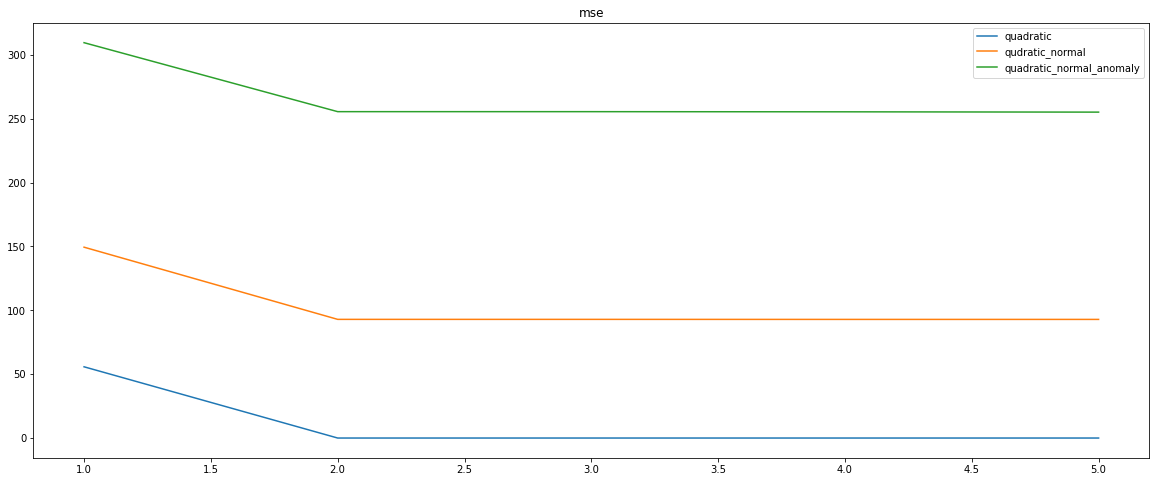

In [362]:
errs = []
errs_normal = []
errs_normal_anomaly = []

pow_range = range(1, 6)
for power in pow_range:
    errs.append((np.square(data["quadratic"] - lsm(data["quadratic"], power))).mean())
    errs_normal.append((np.square(data["quadratic_normal"] - lsm(data["quadratic_normal"], power))).mean())
    errs_normal_anomaly.append((np.square(data["quadratic_normal_anomalies"] - lsm(data["quadratic_normal_anomalies"], power))).mean())

plt.title("mse")
plt.plot(pow_range, errs, label="quadratic")
plt.plot(pow_range, errs_normal, label="qudratic_normal")
plt.plot(pow_range, errs_normal_anomaly, label="quadratic_normal_anomaly")
plt.legend()
plt.show()

In [363]:
PARAM_rec_pow = 2

## LSM Data

In [364]:
data["quadratic_lsm"] = lsm(data["quadratic"], PARAM_rec_pow)
data["quadratic_normal_lsm"] = lsm(data["quadratic_normal"], PARAM_rec_pow)
data["quadratic_normal_anomalies_lsm"] = lsm(data["quadratic_normal_anomalies"], PARAM_rec_pow)

describe_all(data, "quadratic")

,quadratic_normal,quadratic_normal_anomalies,quadratic_lsm,quadratic_normal_lsm,quadratic_normal_anomalies_lsm
count,"1,000.000","1,000.000","1,000.000","1,000.000","1,000.000"
mean,-0.089,-0.561,0.000,-0.089,-0.561
std,9.651,16.033,0.000,0.368,1.106
min,-36.902,-57.041,-0.000,-0.609,-2.728
25%,-6.471,-7.614,0.000,-0.418,-1.478
50%,-0.215,-0.215,0.000,-0.144,-0.427
75%,6.521,7.291,0.000,0.213,0.424
max,27.144,57.640,0.000,0.653,1.074
var,93.148,257.045,0.000,0.136,1.223


## Plots

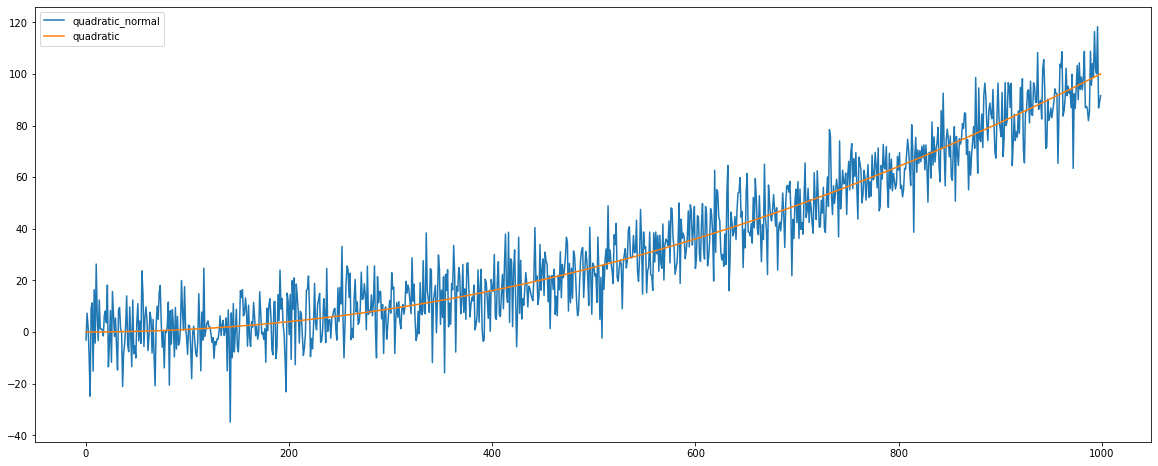

In [365]:
plt.plot(data["quadratic_normal"], label="quadratic_normal")
plt.plot(data["quadratic"], label="quadratic")
plt.legend()
plt.show()

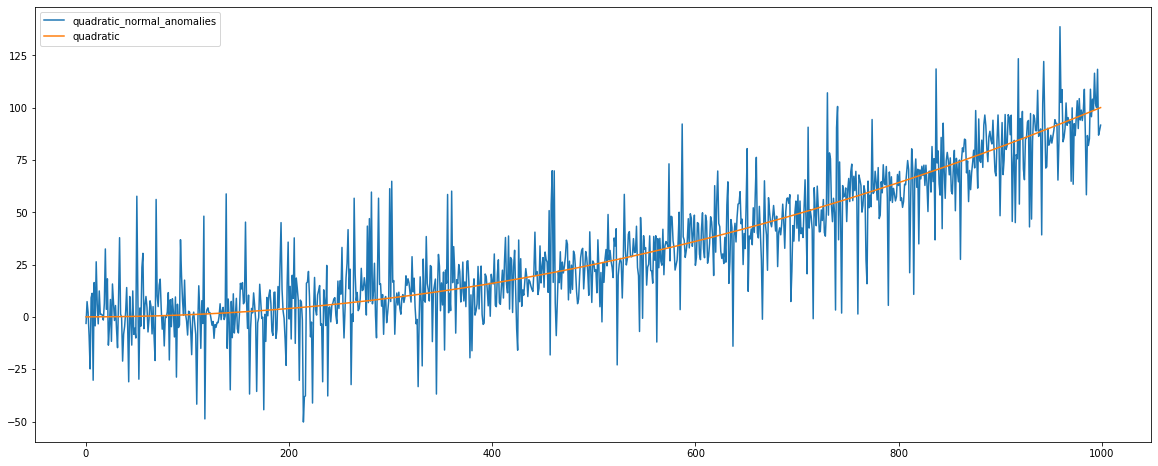

In [366]:
plt.plot(data["quadratic_normal_anomalies"], label="quadratic_normal_anomalies")
plt.plot(data["quadratic"], label="quadratic")
plt.legend()
plt.show()

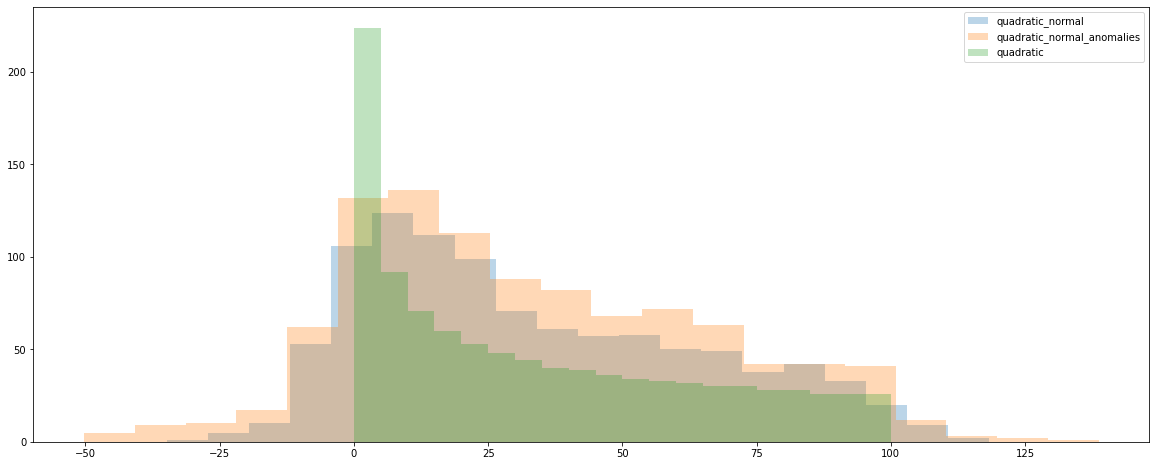

In [367]:
plt.hist(data["quadratic_normal"], bins=20, alpha=0.3, label="quadratic_normal")
plt.hist(data["quadratic_normal_anomalies"], bins=20, alpha=0.3, label="quadratic_normal_anomalies")
plt.hist(data["quadratic"], bins=20, alpha=0.3, label="quadratic")
plt.legend()
plt.show()

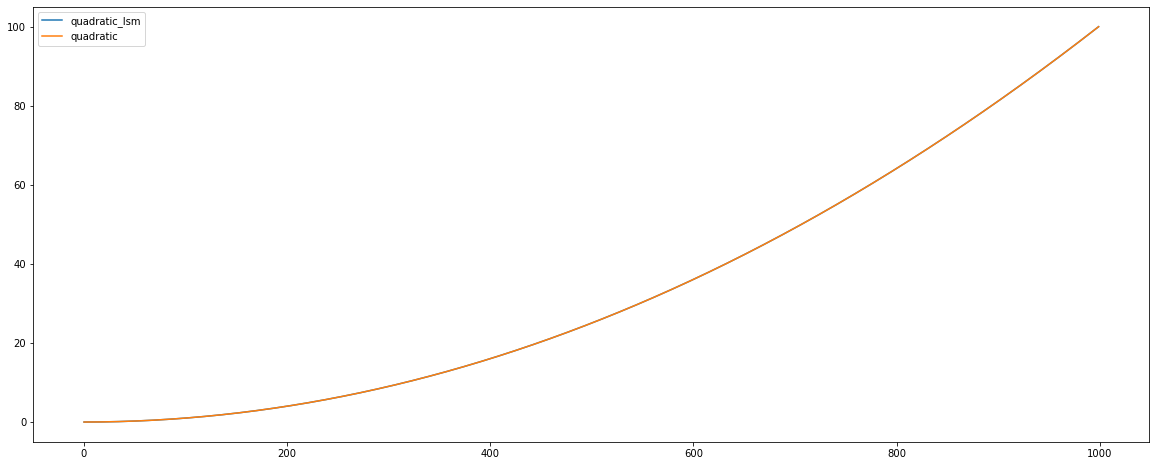

In [368]:
plt.plot(data["quadratic_lsm"], label="quadratic_lsm")
plt.plot(data["quadratic"], label="quadratic")
plt.legend()
plt.show()

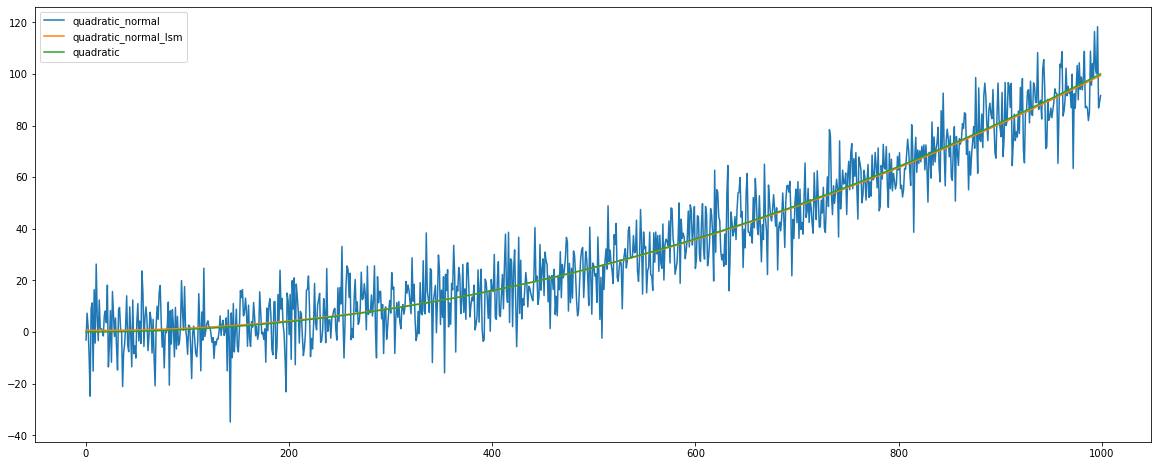

In [369]:
plt.plot(data["quadratic_normal"], label="quadratic_normal")
plt.plot(data["quadratic_normal_lsm"], label="quadratic_normal_lsm")
plt.plot(data["quadratic"], label="quadratic")
plt.legend()
plt.show()

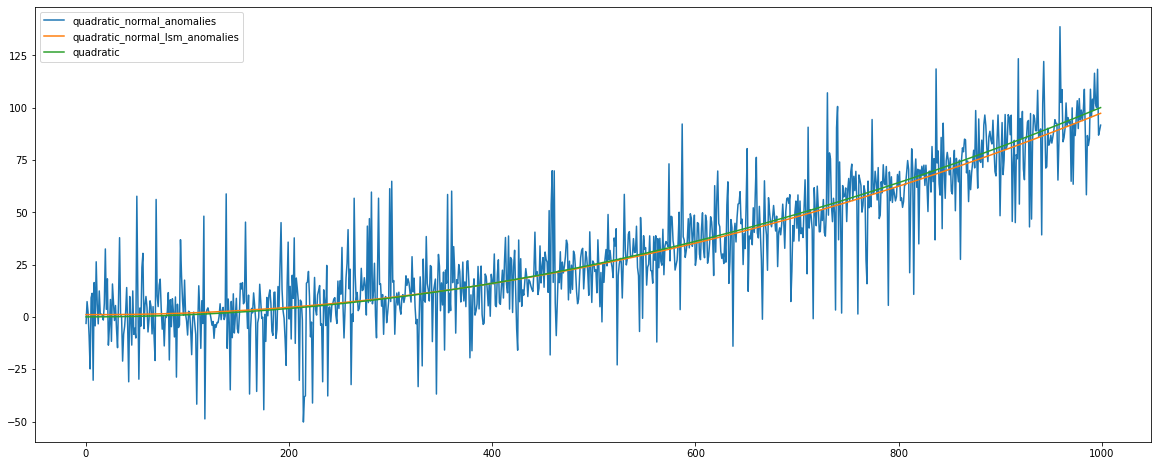

In [370]:
plt.plot(data["quadratic_normal_anomalies"], label="quadratic_normal_anomalies")
plt.plot(data["quadratic_normal_anomalies_lsm"], label="quadratic_normal_lsm_anomalies")
plt.plot(data["quadratic"], label="quadratic")
plt.legend()
plt.show()

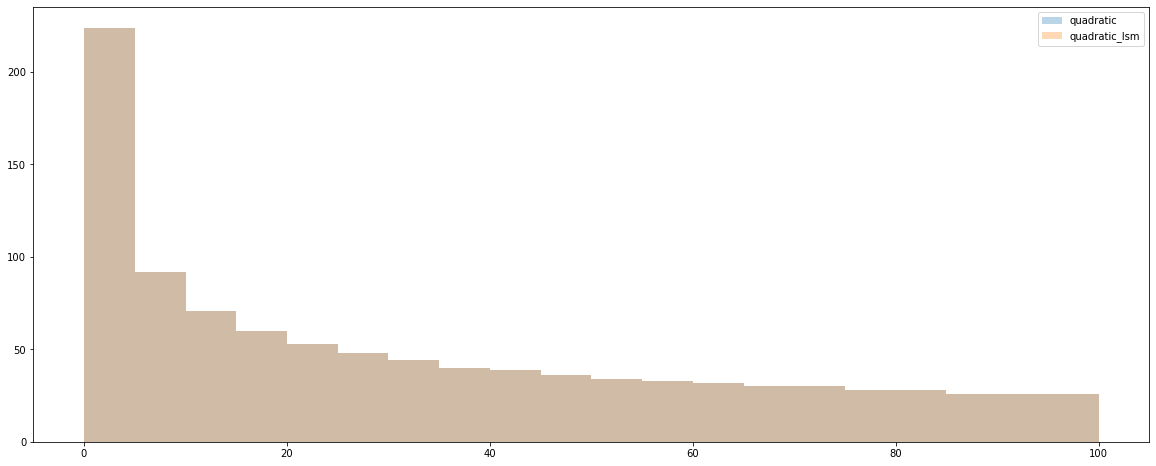

In [371]:
plt.hist(data["quadratic"], bins=20, alpha=0.3, label="quadratic")
plt.hist(data["quadratic_lsm"], bins=20, alpha=0.3, label="quadratic_lsm")
plt.legend()
plt.show()

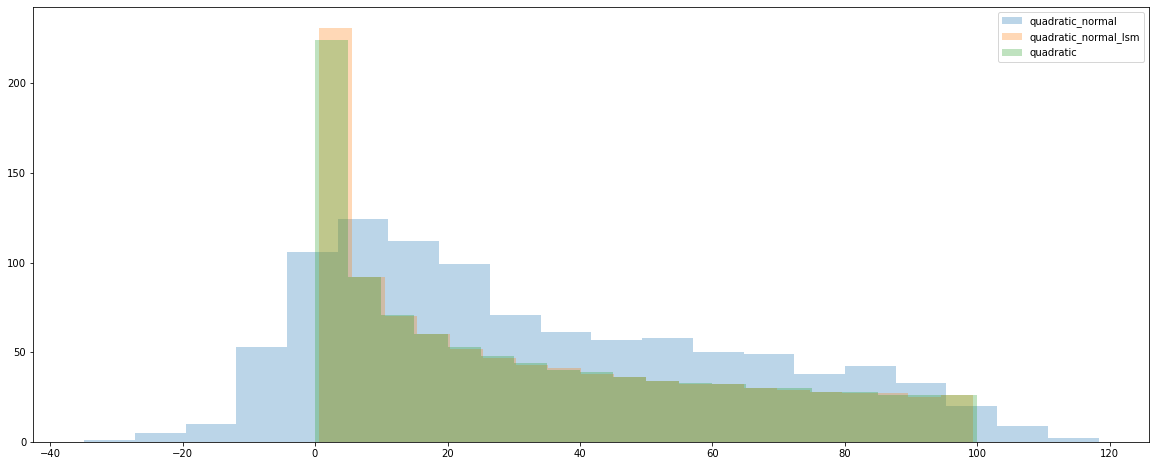

In [372]:
plt.hist(data["quadratic_normal"], bins=20, alpha=0.3, label="quadratic_normal")
plt.hist(data["quadratic_normal_lsm"], bins=20, alpha=0.3, label="quadratic_normal_lsm")
plt.hist(data["quadratic"], bins=20, alpha=0.3, label="quadratic")
plt.legend()
plt.show()

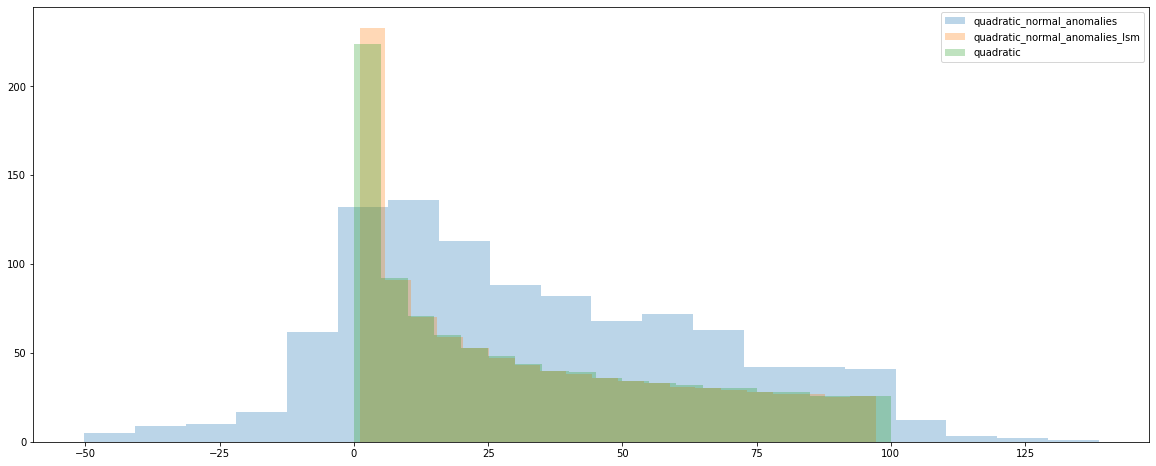

In [373]:
plt.hist(data["quadratic_normal_anomalies"], bins=20, alpha=0.3, label="quadratic_normal_anomalies")
plt.hist(data["quadratic_normal_anomalies_lsm"], bins=20, alpha=0.3, label="quadratic_normal_anomalies_lsm")
plt.hist(data["quadratic"], bins=20, alpha=0.3, label="quadratic")
plt.legend()
plt.show()

77.0


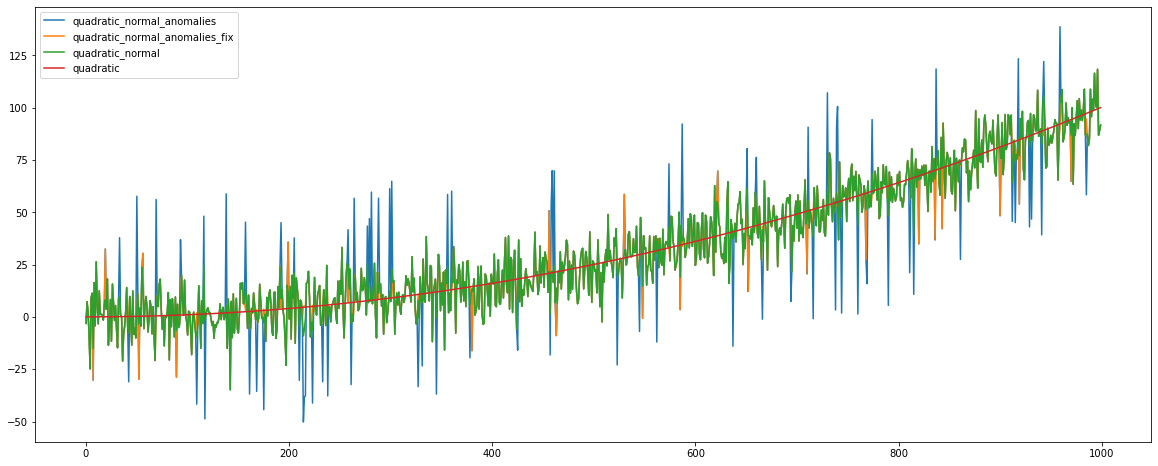

In [380]:
std3 = 2 * (data["quadratic_normal_anomalies"] - data["quadratic_normal_anomalies_lsm"]).std()

anomaly_pos = np.abs(data["quadratic_normal_anomalies"] - data["quadratic_normal_anomalies_lsm"]) > std3

data["quadratic_normal_anomalies_fix"] = data["quadratic_normal_anomalies"].copy()
data["quadratic_normal_anomalies_fix"][anomaly_pos] = data["quadratic_normal_anomalies_lsm"][anomaly_pos]
anomaly_count = anomaly_pos.sum()

print((anomaly_count*100/PARAM_selection_size)/PARAM_anomaly_size)

plt.plot(data["quadratic_normal_anomalies"], label="quadratic_normal_anomalies")
plt.plot(data["quadratic_normal_anomalies_fix"], label="quadratic_normal_anomalies_fix")
plt.plot(data["quadratic_normal"], label="quadratic_normal")
plt.plot(data["quadratic"], label="quadratic")
plt.legend()
plt.show()

In [375]:
describe_all(data, "quadratic")

,quadratic_normal,quadratic_normal_anomalies,quadratic_lsm,quadratic_normal_lsm,quadratic_normal_anomalies_lsm,quadratic_normal_anomalies_fix
count,"1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000"
mean,-0.089,-0.561,0.000,-0.089,-0.561,-0.670
std,9.651,16.033,0.000,0.368,1.106,13.602
min,-36.902,-57.041,-0.000,-0.609,-2.728,-49.544
25%,-6.471,-7.614,0.000,-0.418,-1.478,-7.264
50%,-0.215,-0.215,0.000,-0.144,-0.427,-0.279
75%,6.521,7.291,0.000,0.213,0.424,6.753
max,27.144,57.640,0.000,0.653,1.074,47.105
var,93.148,257.045,0.000,0.136,1.223,185.008
